<a href="https://colab.research.google.com/github/zyf2021/fcc_book_recommendation_knn/blob/main/fcc_book_recommendation_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Book Recommendation Engine using KNN
In this challenge, you will create a book recommendation algorithm using K-Nearest Neighbors.

You will use the Book-Crossings dataset. This dataset contains 1.1 million ratings (scale of 1-10) of 270,000 books by 90,000 users.

After importing and cleaning the data, use NearestNeighbors from sklearn.neighbors to develop a model that shows books that are similar to a given book. The Nearest Neighbors algorithm measures the distance to determine the “closeness” of instances.

Create a function named get_recommends that takes a book title (from the dataset) as an argument and returns a list of 5 similar books with their distances from the book argument.

In [1]:
# import libraries (you may add additional imports but you may not have to)
import numpy as np
import pandas as pd
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

In [3]:
# get data files
!wget https://cdn.freecodecamp.org/project-data/books/book-crossings.zip


!unzip book-crossings.zip

books_filename = 'BX-Books.csv'
ratings_filename = 'BX-Book-Ratings.csv'

--2024-07-20 19:29:36--  https://cdn.freecodecamp.org/project-data/books/book-crossings.zip
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 172.67.70.149, 104.26.2.33, 104.26.3.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|172.67.70.149|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26085508 (25M) [application/zip]
Saving to: ‘book-crossings.zip’

book-crossings.zip  100%[===================>]  24.88M  68.7MB/s    in 0.4s    

2024-07-20 19:29:38 (68.7 MB/s) - ‘book-crossings.zip’ saved [26085508/26085508]

Archive:  book-crossings.zip
  inflating: BX-Book-Ratings.csv     
  inflating: BX-Books.csv            
  inflating: BX-Users.csv            


## Шаг 1: Импорт и очистка данных

1. **Импортируйте необходимые библиотеки:**
   - Вам понадобятся библиотеки для работы с данными (`pandas`) и для реализации алгоритма K-ближайших соседей (`sklearn.neighbors`).

2. **Загрузите данные:**
   - Загрузите датасет, который включает информацию о книгах, пользователях и их оценках.

3. **Очистка данных:**
   - Удалите пользователей, которые оставили менее 200 оценок, чтобы избежать статистической незначительности.
   - Удалите книги, которые были оценены менее 100 раз, чтобы сосредоточиться на наиболее популярных книгах.

### Шаг 2: Подготовка данных

1. **Создание матрицы пользователь-книга:**
   - Сформируйте матрицу, где строки представляют пользователей, столбцы представляют книги, а значения — оценки, которые пользователи дали книгам.

2. **Заполнение пропущенных значений:**
   - Решите, как будете заполнять пропущенные значения в матрице (например, нулями или средними значениями).

### Шаг 3: Модель K-ближайших соседей

1. **Создание модели:**
   - Используйте алгоритм K-ближайших соседей (`NearestNeighbors` из `sklearn.neighbors`).
   - Настройте параметры модели, такие как количество соседей (k) и метрику расстояния (например, косинусное расстояние).

2. **Обучение модели:**
   - Обучите модель на данных, которые вы подготовили.

### Шаг 4: Функция для рекомендаций

1. **Создание функции `get_recommends`:**
   - Эта функция должна принимать название книги и находить ближайших соседей для данной книги.
   - Функция должна возвращать список из 5 наиболее похожих книг и их расстояния до данной книги.

### Подсказки по каждому шагу:

1. **Импорт и очистка данных:**
   - Убедитесь, что данные загружаются корректно и имеют нужный формат.
   - Проверьте, что фильтрация данных по количеству оценок пользователей и книг выполнена правильно.

2. **Подготовка данных:**
   - Постройте матрицу пользователь-книга с помощью `pivot_table`.
   - Определите, как будете обрабатывать пропущенные значения.

3. **Модель K-ближайших соседей:**
   - Выберите метрику расстояния, которая лучше всего подходит для вашей задачи (например, косинусное расстояние).
   - Определите оптимальное количество соседей (k) для вашей модели.

4. **Функция для рекомендаций:**
   - Убедитесь, что функция корректно находит ближайших соседей.
   - Проверьте, что результат функции соответствует ожидаемому формату.

Эти шаги и подсказки помогут вам структурировать решение задачи и эффективно реализовать алгоритм рекомендаций для книг.

# Попытка 2

In [4]:
# import csv data into dataframes
df_books = pd.read_csv(
    books_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_filename,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [5]:
user_counts = df_ratings['user'].value_counts()
user_counts = user_counts[user_counts > 200].index
filtered_ratings = df_ratings[df_ratings['user'].isin(user_counts)]
isbn_counts = df_ratings['isbn'].value_counts()
isbn_counts = isbn_counts[isbn_counts > 100].index
filtered_ratings = filtered_ratings[filtered_ratings['isbn'].isin(isbn_counts)]
filtered_ratings.head()

,user,isbn,rating
1456,277427,002542730X,10.0
1469,277427,0060930535,0.0
1471,277427,0060934417,0.0
1474,277427,0061009059,9.0
1484,277427,0140067477,0.0


In [6]:
full_df = pd.merge(df_books, filtered_ratings, on='isbn')
full_df.head()

,isbn,title,author,user,rating
0,0440234743,The Testament,John Grisham,277478,0.0
1,0440234743,The Testament,John Grisham,2977,0.0
2,0440234743,The Testament,John Grisham,3363,0.0
3,0440234743,The Testament,John Grisham,7346,9.0
4,0440234743,The Testament,John Grisham,9856,0.0


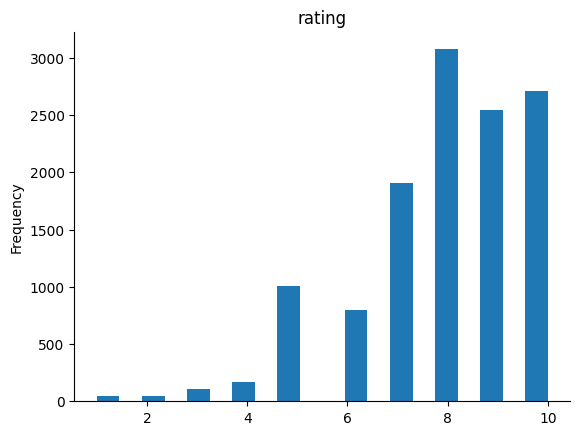

In [17]:
# @title rating

from matplotlib import pyplot as plt
full_df['rating'].plot(kind='hist', bins=20, title='rating')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [7]:
full_df.isnull().sum()

isbn      0
title     0
author    0
user      0
rating    0
dtype: int64

In [8]:
(full_df == 0).sum()

isbn          0
title         0
author        0
user          0
rating    36585
dtype: int64

In [9]:
# Удалим все с нулевым рейтингом
full_df = full_df.loc[full_df['rating'] != 0]

In [10]:
(full_df == 0).sum()

isbn      0
title     0
author    0
user      0
rating    0
dtype: int64

In [ ]:
# Вычисляем среднее значение для каждого ISBN, исключая нули
# isbn_mean_ratings = filtered_ratings[filtered_ratings['rating'] != 0].groupby('isbn')['rating'].mean()
# Функция для замены нулевых значений на среднее значение
def replace_zero_with_mean(row):
    if row['rating'] == 0:
        return isbn_mean_ratings[row['isbn']]
    else:
        return row['rating']

# Применяем функцию к DataFrame
# filtered_ratings['rating'] = filtered_ratings.apply(replace_zero_with_mean, axis=1)
# print("DataFrame после замены нулевых значений на средние значения для каждого ISBN:")
# print(filtered_ratings)

In [25]:
full_df_pivot = full_df.pivot(index='isbn', columns='user', values='rating').fillna(0)

In [26]:
full_df_pivot

user,254,2276,2766,2977,3363,4017,4385,6242,6251,6323,...,273979,274004,274061,274301,274308,274808,275970,277427,277639,278418
isbn,,,,,,,,,,,,,,,,,,,,,
002542730X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0
0060008032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060096195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
006016848X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0060173289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1573227331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1573229571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [52]:
# add your code here - consider creating a new cell for each section of code
X = full_df_pivot.values

# Создание и обучение модели K-ближайших соседей
model = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=5, n_jobs=-1)
model.fit(X)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1)

# Функция подбора рекомендаций
1. Найти isbn книги в df book
2. Найти по isbn запись в фильтеред_датафрейм
3. model.fit()
4. Отправить эту строку на подбор данных



```
[
  'The Queen of the Damned (Vampire Chronicles (Paperback))',
  [
    ['Catch 22', 0.793983519077301],
    ['The Witching Hour (Lives of the Mayfair Witches)', 0.7448656558990479],
    ['Interview with the Vampire', 0.7345068454742432],
    ['The Tale of the Body Thief (Vampire Chronicles (Paperback))', 0.5376338362693787],
    ['The Vampire Lestat (Vampire Chronicles, Book II)', 0.5178412199020386]
  ]
]
```



In [65]:
# function to return recommended books - this will be tested
def get_recommends(book = ""):

  # Достанем isbn
  current_isbn = full_df[full_df['title'] == book].iloc[0]['isbn']
  # print(current_isbn)
  # Преобразуем в numpy строку с оценками выбранного isbn
  full_df_pivot.loc[current_isbn].values.reshape(1, -1)
  # Найдем подходящие книги по модели
  distances, indices = model.kneighbors(full_df_pivot.loc[current_isbn].values.reshape(1, -1), n_neighbors=6)
  # print("Расстояния до ближайших соседей:", distances)
  # print("Индексы ближайших соседей:", indices)
  recommended_books = []
  # Преобразуем indices в одномерный массив, иначе рисует кракозябру...
  indices = indices.flatten()
  distances = distances.flatten()
  for i in range(len(indices)):

    isbn = full_df_pivot.index[indices[i]]

    if distances[i] == 0:
      recommended_books.append(full_df[full_df['isbn'] == isbn].iloc[0]['title'])
      recommended_books.append([])
    else:
      recommended_books[1].append([full_df[full_df['isbn'] == isbn].iloc[0]['title'], distances[i]])

  # отсортировать это все
  recommended_books[1] = sorted(recommended_books[1], key=lambda x: x[1], reverse=True)

  return recommended_books

In [66]:
books = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
print(books)


def test_book_recommendation():
  test_pass = True
  recommends = get_recommends("Where the Heart Is (Oprah's Book Club (Paperback))")
  if recommends[0] != "Where the Heart Is (Oprah's Book Club (Paperback))":
    test_pass = False
  recommended_books = ["I'll Be Seeing You", 'The Weight of Water', 'The Surgeon', 'I Know This Much Is True']
  recommended_books_dist = [0.8, 0.77, 0.77, 0.77]
  for i in range(2):
    if recommends[1][i][0] not in recommended_books:
      test_pass = False
    if abs(recommends[1][i][1] - recommended_books_dist[i]) >= 0.05:
      test_pass = False
  if test_pass:
    print("You passed the challenge! 🎉🎉🎉🎉🎉")
  else:
    print("You haven't passed yet. Keep trying!")

test_book_recommendation()

["Where the Heart Is (Oprah's Book Club (Paperback))", [["I'll Be Seeing You", 0.8016211], ['The Weight of Water', 0.77085835], ['The Surgeon', 0.7699411], ['I Know This Much Is True', 0.76770747], ['The Lovely Bones: A Novel', 0.7230184]]]
You passed the challenge! 🎉🎉🎉🎉🎉
